
TO RUN IN GOOGLE COLAB
<h1>TS FROM S1</h1>


ARIMA, short for ‘Auto Regressive Integrated Moving Average’ is actually a class of models that ‘explains’ a given time series based on its own past values, that is, its own lags and the lagged forecast errors, so that equation can be used to forecast future values

see explation here  https://medium.com/@stallonejacob/time-series-forecast-a-basic-introduction-using-python-414fcb963000



-https://www.youtube.com/watch?v=e8Yw4alG16Q
-https://github.com/Manishms18/Air-Passengers-Time-Series-Analysis
- Importing all the required libraries for analysis using Colab


see explanation here:
- https://www.youtube.com/watch?v=F5cz6RGrqf8

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
%matplotlib inline
from matplotlib.pylab import rcParams
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

#Not pre-installed in Colab
#!python -m pip install pmdarima

#!python -V
#!pip list | grep pandas
#!pip list | grep numpy
#!pip list | grep matplotlib
#!pip list | grep matplotlib.pylab
#!pip list | grep statsmodel
#!pip list | grep pmdarima

#Check version in Anaconda python notebook:
#!python -V # Python 3.9.13
#!pip  show pandas #Version: 1.4.4
#!pip  show numpy #Version: 1.21.5
#!pip  show matplotlib #Version: 3.5.2
#!pip  show statsmodels #Version: 0.13.5
#!pip  show pmdarima #Version: 2.0.2


VERSIONS

Python 3.8.10
pandas                        1.3.5
pandas-datareader             0.9.0
pandas-gbq                    0.17.9
pandas-profiling              1.4.1
sklearn-pandas                1.8.0
numpy                         1.21.6
matplotlib                    3.2.2
matplotlib-venn               0.11.7
statsmodels                   0.12.2
pmdarima                      2.0.2

:- Reading the dataset file and checking the size of file//
upload the file into Colab, see TOC menu
- FILE FORMAT IS IMPORTANT!!!
-EXAMPLE

- DATE,RADAR
- 2017-02-07,-12.047

In [2]:
# modify  and rename to: DATE FORMAT YYYY-MM--DD
#use EXCEL to define DATE format and save as CSV file
# ----CONFIRM FORMAT, NOT IN EXCEL BUT IN NOTEPAD++-----
# follow directions from: https://www.youtube.com/watch?v=ngAE0dME9RA
#1.Open csv in excel and rename system:time_start column to DATE 
#2.Rename first three letters of month to spanish and and convert string into MYD
#3.then format-change to YYYY-MM-DD
#4.Save in xlsx format, then save in cvs format
#5.Confirm with Notapad date format YYYY-MM--DD
#6.Keep the date and a single column of S1 before uploading the file into Colab, rename that column to RADAR
#7.Define frequency below accordingly: 6D, 12D.


path=r"C:\Users\jesus\Downloads\S1_mergeBOTH_rvi.csv"  #to be used with windows and Anaconda
#path="/content/ee-chart (70).csv"
#path="/content/LosPericos_ascending_VH_230202.csv"
#path="/content/S1_ASCENDING_230206_n279.csv"

# read the file with pandas: pd.read_csv(path), location by defaul in Colab or Anaconda for Windows
data = pd.read_csv(path)
# apply the dtype attribute

data = pd.read_csv(path, index_col='DATE', parse_dates=True, infer_datetime_format=True).asfreq(freq='6D')
#data['DATE']=pd.to_datetime(data['DATE'], infer_datetime_format=True)#to be depracated
#data=data.set_index(['DATE'])

#Fill NaN data
data = data.fillna(method = 'ffill')

#define dates range if needed:

data = data[(data.index>'2017-05-01') & (data.index<'2024-12-31')]


print(data.head(15))
print(data.tail(15))

result_data_type = data.dtypes
print("Output:")
print(result_data_type)
len(data)


            RADAR
DATE             
2017-05-20  0.801
2017-05-26  0.670
2017-06-01  0.837
2017-06-07  0.714
2017-06-13  0.776
2017-06-19  0.698
2017-06-25  0.839
2017-07-01  0.675
2017-07-07  0.826
2017-07-13  0.712
2017-07-19  0.756
2017-07-25  0.693
2017-07-31  0.716
2017-08-06  0.615
2017-08-12  0.948
            RADAR
DATE             
2022-11-08  0.724
2022-11-14  0.897
2022-11-20  0.726
2022-11-26  0.750
2022-12-02  0.743
2022-12-08  0.887
2022-12-14  0.810
2022-12-20  0.851
2022-12-26  0.828
2023-01-01  0.864
2023-01-07  0.743
2023-01-13  0.749
2023-01-19  0.743
2023-01-25  0.901
2023-01-31  0.901
Output:
RADAR    float64
dtype: object


348

- Creating the 'Date' as Index for data and viewing the dataset
- FORMAT YYYY-MM--DD

In [3]:
data.describe()

,RADAR
count,348.000000
mean,0.802267
std,0.126246
min,0.513000
25%,0.714000
50%,0.786000
75%,0.882500
max,1.246000


In [4]:
#export fill data and confir frequency
data.to_csv('data1.csv')
path="/content/data1.csv"

In [5]:
#next line aggregates 6-day values into monthly (M) mean() values, it can also be sum()  
#data=data['RADAR'].resample('M').mean()
#data

- Visualizing the Time Series plot

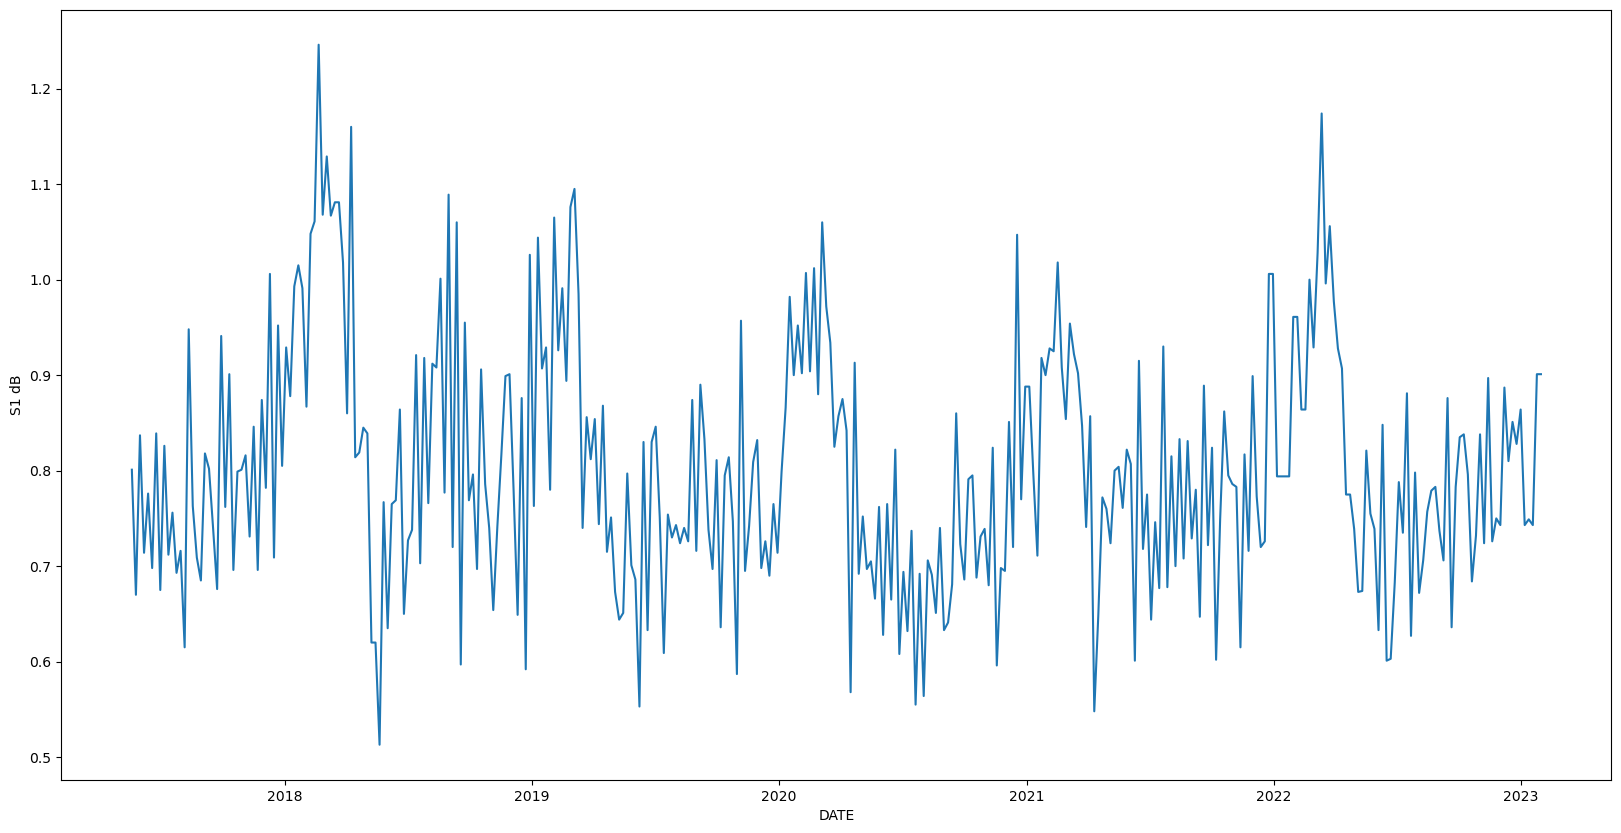

In [6]:
plt.figure(figsize=(20,10))
plt.xlabel("DATE")
plt.ylabel("S1 dB")
plt.plot(data['RADAR'])

- As we know that, A stationary Time Series is one which characteristics like mean and variance does not change over time
- Preparing the data for analyzing the Rolling Mean and Standard Deviation to check stationarity for given Time Series
- co2 is note stationary because the mean increases each year, with a "long term direction"
- Try different periods for rolling, why 12?, the airpassanger data is monthly data, 12 will make a year.  Since my data is each 6 days, probably 60?

In [7]:
#define number of "dates" fo moving window
dates = 3

In [8]:
# 61 dates (before present date), aproximately one year with 6-day data, to look for long term direction of mean and stdv

rolmean=data.rolling(window=dates).mean()
rolstd=data.rolling(window=dates).std()
# print 60 values for mean and 60 values for standard deviation
print(rolmean.tail(15))
print(rolstd.tail(15))

               RADAR
DATE                
2022-11-08  0.764667
2022-11-14  0.819667
2022-11-20  0.782333
2022-11-26  0.791000
2022-12-02  0.739667
2022-12-08  0.793333
2022-12-14  0.813333
2022-12-20  0.849333
2022-12-26  0.829667
2023-01-01  0.847667
2023-01-07  0.811667
2023-01-13  0.785333
2023-01-19  0.745000
2023-01-25  0.797667
2023-01-31  0.848333
               RADAR
DATE                
2022-11-08  0.063634
2022-11-14  0.087945
2022-11-20  0.099309
2022-11-26  0.092580
2022-12-02  0.012342
2022-12-08  0.081193
2022-12-14  0.072058
2022-12-20  0.038527
2022-12-26  0.020551
2023-01-01  0.018230
2023-01-07  0.062132
2023-01-13  0.068193
2023-01-19  0.003464
2023-01-25  0.089540
2023-01-31  0.091221


- Plotting the Rolling Mean and Standard Deviation, which has window of 54
- By looking below plot, we conclude that, it is stationary bcoz mean and variance are constant

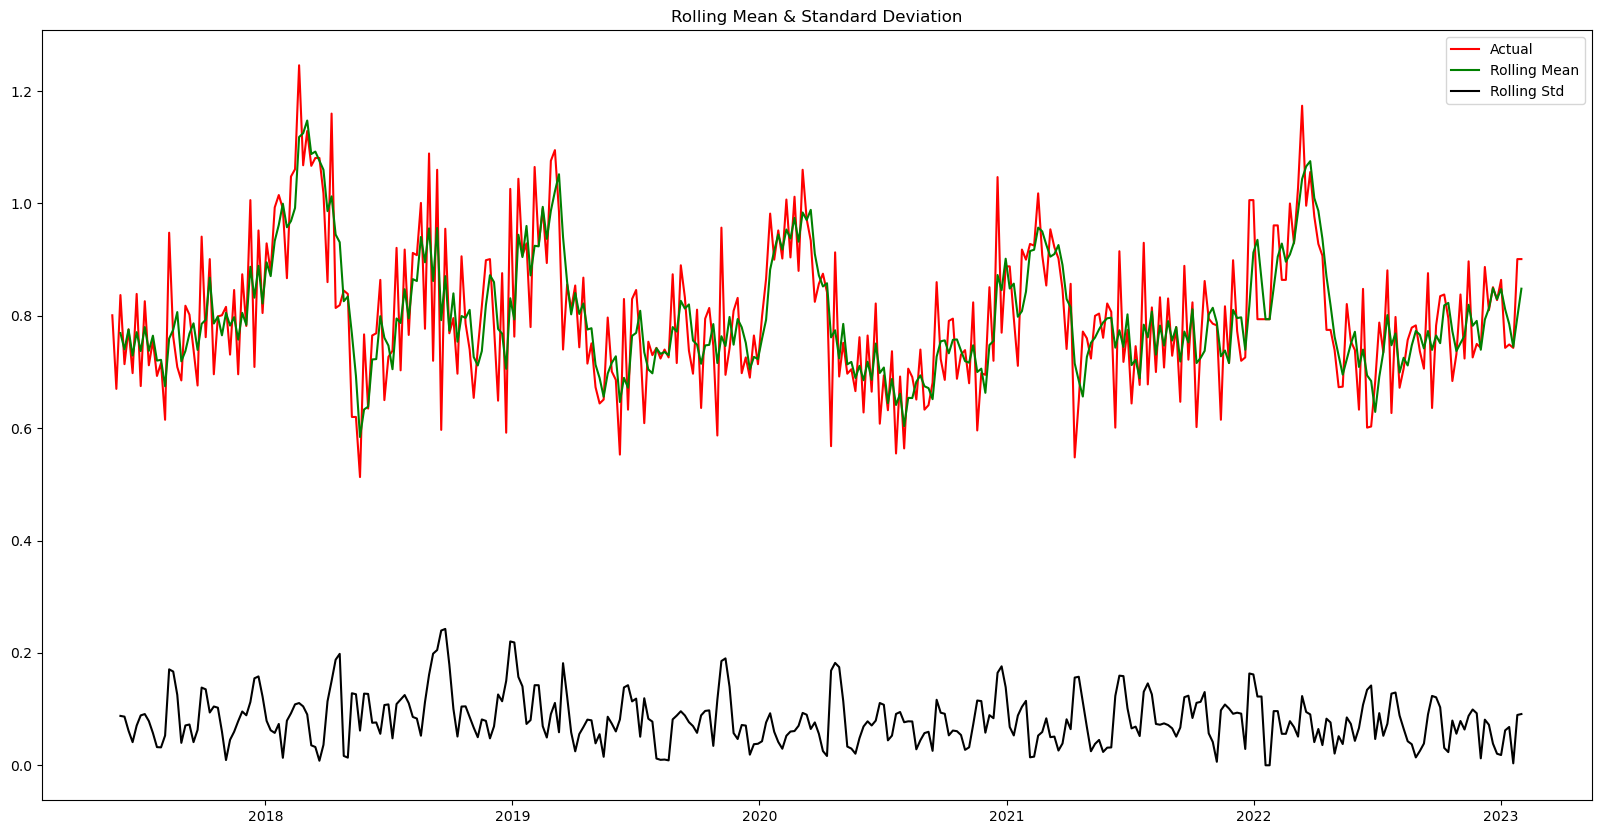

In [9]:
plt.figure(figsize=(20,10))
actual=plt.plot(data, color='red', label='Actual')
mean_6=plt.plot(rolmean, color='green', label='Rolling Mean') 
std_6=plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

- Using ADF (Augmented Dickey-Fuller Test) to check stationarity, another approach based on statistics.
- ADF has : 
<b>Null hypothesis         - Time Series is non-stationary</b> i.e. it has  long term trend

In [10]:
data.dropna(inplace=True)

In [11]:
from statsmodels.tsa.stattools import adfuller
print('Dickey-Fuller Test: ')
dftest=adfuller(data['RADAR'], autolag='AIC')
dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)
#The p value is a proportion: if your p value is 0.05, that means that 5% of the time you would see a test statistic at least as extreme 
#as the one you found if the null hypothesis was true.
# Null hypothesis: time series is non-stationary (mean and variance are non constat, not good to predict)
# RULE OF THUMB: p-value must be 0.05 or less to reject null hypothesis (we want to reject the null hypothesis)
#p-value = 0.0057 this calculated p-value is lower than 0.05.  Then we reject null hypothesis. 
# since data is stationary we can proceed with ARIMA, otherwise follow the other methods to change from non-statationary TS into an stationary TS.


Dickey-Fuller Test: 
Test Statistic           -5.209832
p-value                   0.000008
Lags Used                10.000000
No. of Obs              337.000000
Critical Value (1%)      -3.449904
Critical Value (5%)      -2.870155
Critical Value (10%)     -2.571360
dtype: float64


- From above ADF test, we reject the null hypothesis for S1 since p-value is lower than 0.05, it has no long term trend, is stationary

- Testing Rolling Mean with window 12 on above log transformation and concluded non-stationary, again
- Try different periods for rolling, why 12?, the airpassanger data is monthly data, 12 will make a year.  Since my data is each 6 days, probably 60?




- Defining function for Rolling Mean and Standard Deviation & ADF test
- note "def stationary(timeseries)" does nothing, is a function that allows to calculate mean and std for a given TS, plot the TS and calculate ADF statistics.
-The function is then called in the next cell with the TS.

In [12]:
from statsmodels.tsa.stattools import adfuller
def stationarity(timeseries):
    
    rolmean=timeseries.rolling(window=dates).mean()
    rolstd=timeseries.rolling(window=dates).std()
    
    plt.figure(figsize=(20,10))
    actual=plt.plot(timeseries, color='red', label='Actual')
    mean_6=plt.plot(rolmean, color='green', label='Rolling Mean') 
    std_6=plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    print('Dickey-Fuller Test: ')
    dftest=adfuller(timeseries['RADAR'], autolag='AIC')
    dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

-try this with different rolling parameters!!!!
- Checking the stationarity of differenced data
- From Rolling method, we see that Mean and standard deviation is not varying.
- From ADF, we reject the null hypothesis bcoz p-value is less than 0.05 (significance level)
- Applying all the transformation and methods, our differenced data is now stationary
-check p value, if p value is larger, then we made the dataset worse.

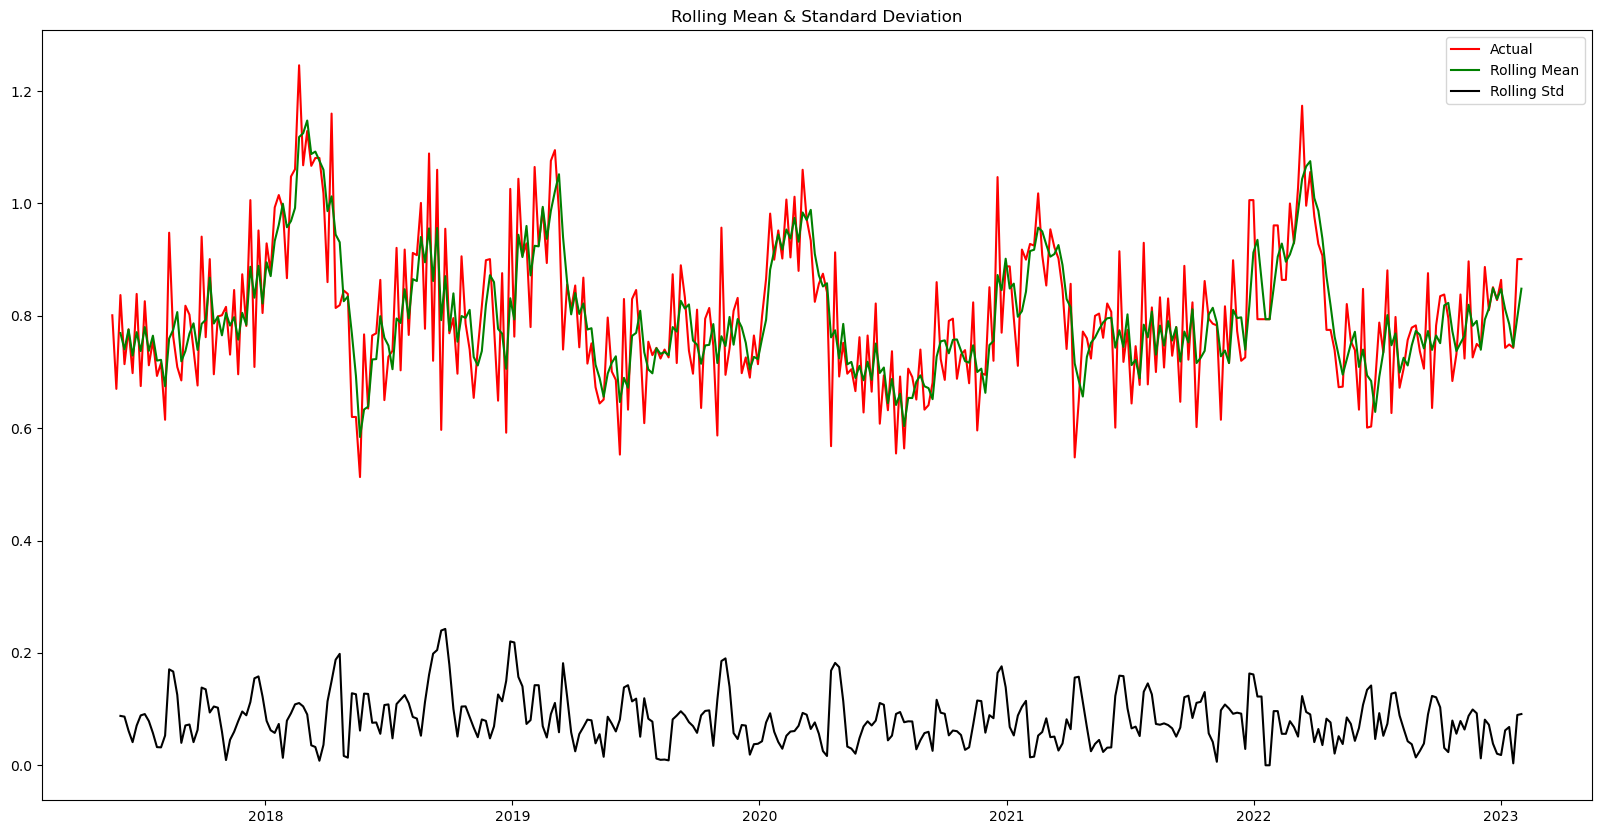

Dickey-Fuller Test: 
Test Statistic           -5.209832
p-value                   0.000008
Lags Used                10.000000
No. of Obs              337.000000
Critical Value (1%)      -3.449904
Critical Value (5%)      -2.870155
Critical Value (10%)     -2.571360
dtype: float64


In [13]:
stationarity(data)

- Since log transformation is non-stationary, applying differencing on our data.

- From above graph and ADF test, we conclude, that the transformations made the TS worse
HERE THE LAST METHOD TO REMOVE NON-STATIONARY IS CALLED "DIFFERENCING PREVIOUS VALUES" is based on log data and only use the keyword "shift"
- by default shift() value within the brackes is 1
- but you can change it to a larger shift, for example shift(2)


CALCULATE RESIDUALS AND EVALUATE STATIONARITY OF RESIDUALS
- Decomposing Time Series into its components : Trend, Seasonality and Residual
- Only after determining trend and seasonality it is possible to calculate the residuals
-SEE FIGURE
-First, the original data in log form,
-Second, where we see the trend of the log form
-Third, the seasonality per year
-Four, the residuals, which are calculated after removing Trend and Seasonality

RESIDUALS MUST  ALSO BE STATIONARY. 
Apply the Dickey-Fuller test to residuals!

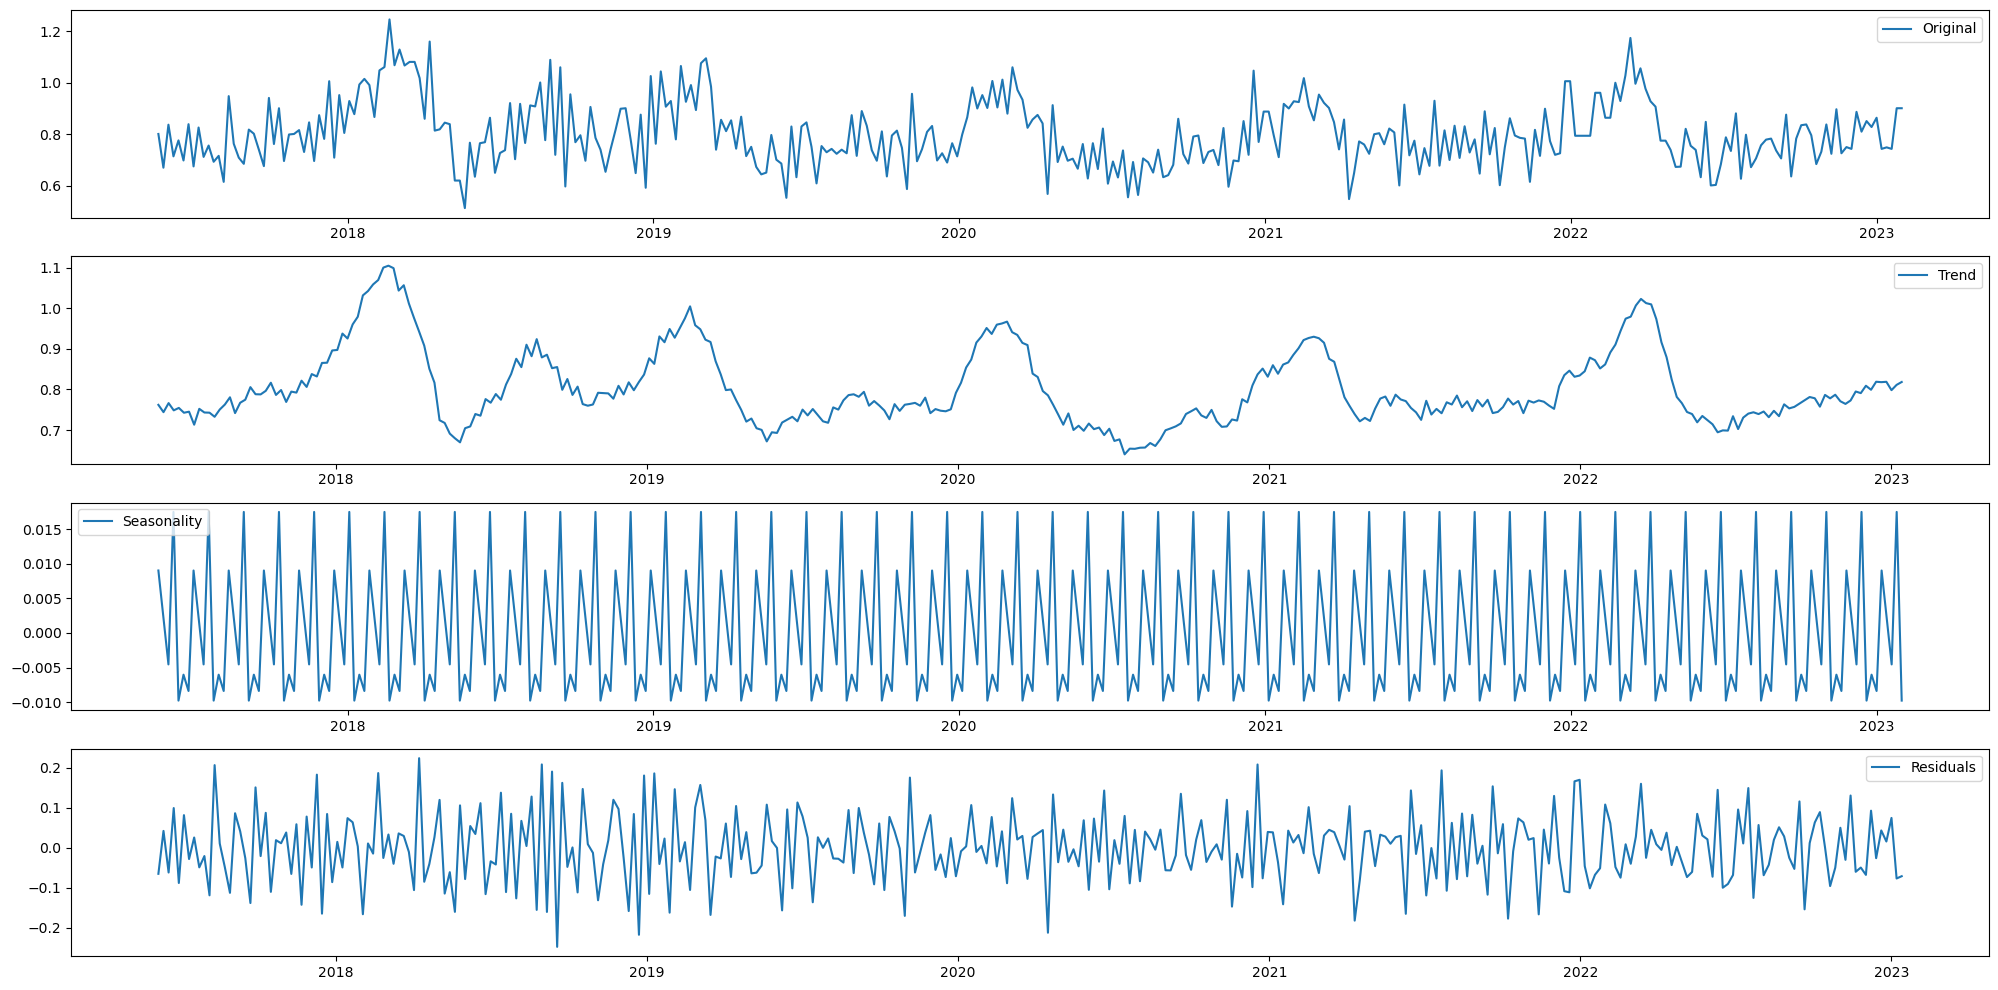

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp=seasonal_decompose(data)
#decomp=seasonal_decompose(data, model='additive')
#decomp=seasonal_decompose(data, model='additive')#, period=61)  #el período equivale al número de observaciones en un año, 6dias * 61 = 366

trend=decomp.trend
seasonal=decomp.seasonal
residual=decomp.resid

plt.figure(figsize=(20,10))
plt.subplot(411)
plt.plot(data, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()



In [15]:
#trend file reduces the noise
trend.to_csv('trend_both_vv.csv')
path="/content/trend_both_vv.csv"

In [16]:
residual.dropna(inplace=True)
print(residual.head(10))
print(residual.tail(10))


DATE
2017-06-07   -0.065661
2017-06-13    0.041639
2017-06-19   -0.062396
2017-06-25    0.098820
2017-07-01   -0.088615
2017-07-07    0.081097
2017-07-13   -0.028741
2017-07-19    0.025196
2017-07-25   -0.049504
2017-07-31   -0.021253
Freq: 6D, Name: resid, dtype: float64
DATE
2022-11-20   -0.060609
2022-11-26   -0.050043
2022-12-02   -0.068332
2022-12-08    0.092259
2022-12-14   -0.026518
2022-12-20    0.042782
2022-12-26    0.015175
2023-01-01    0.074106
2023-01-07   -0.077329
2023-01-13   -0.071618
Freq: 6D, Name: resid, dtype: float64


In [17]:
#this function was created only for residuals without the "statmodels which has the Dickey-Fuller Test" part.

from statsmodels.tsa.stattools import adfuller
def stationarity1(timeseries):
    
    rolmean=timeseries.rolling(window=dates).mean()
    rolstd=timeseries.rolling(window=dates).std()
    
    plt.figure(figsize=(20,10))
    actual=plt.plot(timeseries, color='red', label='Actual')
    mean_6=plt.plot(rolmean, color='green', label='Rolling Mean') 
    std_6=plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation of residuals')
    plt.show(block=False)
  

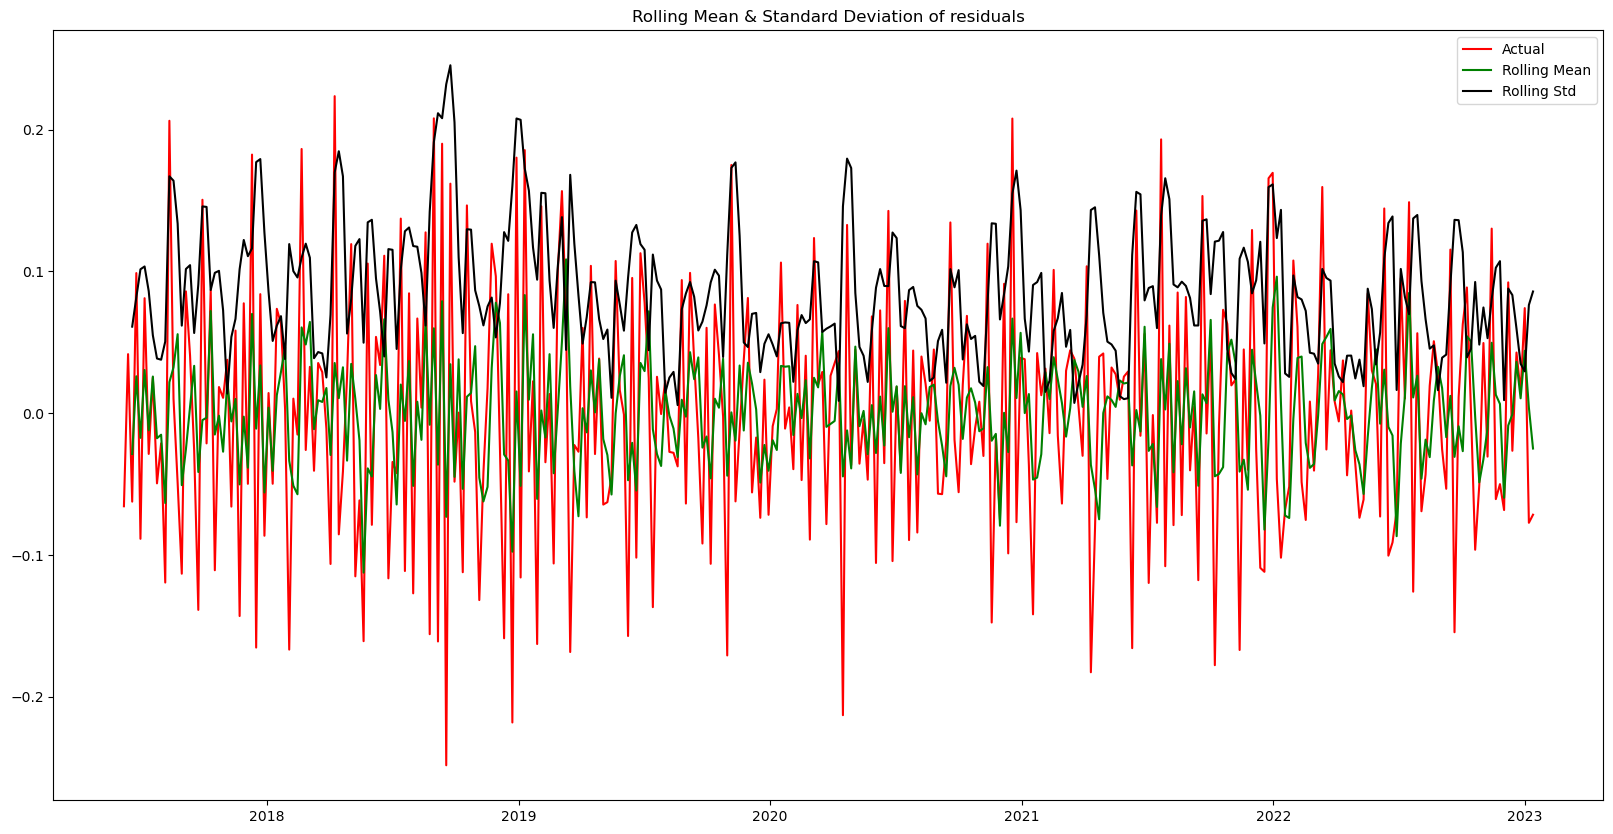

In [18]:
stationarity1(residual)

In [19]:
#NOTE: the "statmodels which has the Dickey-Fuller Test" does not read the "residuals" variable defined before, so, here, 
#I export residual df to a csv file and then apply the Dickey-Fuller Test, i.e. the stationarity of the residuals.

residual.to_csv('residual2.csv')
#path="/content/residual2.csv"
path=r"C:\Users\jesus\Downloads\residual2.csv"
data2=pd.read_csv(path)

from statsmodels.tsa.stattools import adfuller
print('Dickey-Fuller Test: ')
dftest=adfuller(data2['resid'], autolag='AIC')
dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Dickey-Fuller Test: 
Test Statistic           -5.645446
p-value                   0.000001
Lags Used                17.000000
No. of Obs              324.000000
Critical Value (1%)      -3.450695
Critical Value (5%)      -2.870502
Critical Value (10%)     -2.571545
dtype: float64


# THERE ARE TWO FORECASTING MODELS: Moving Average (MA) and ARIMA
Autoregressive Integrated Moving Average (ARIMA)
An autoregressive integrated moving average model is a form of regression analysis that gauges the strength of one dependent variable relative to other changing variables. The model's goal is to predict future. ARIMA models assume that past values have some residual effect on current or future values and use data from the past to forecast future events.

integer values substitute for the parameters to indicate the type of ARIMA model used. The parameters can be defined as:

- p: the number of lag observations in the model, also known as the lag order. AR=autoregressive, how many past observations affect present value.
- d: the number of times the raw observations are differenced; also known as the degree of differencing. (see shift above, either 1 or 2)
- q: the size of the moving average window, also known as the order of the moving average. MA=moving average, how many past observations-errors affect present values

https://www.investopedia.com/

- Plotting the ACF and PACF to find q and p value
- d depends on the shift
- We got q and p both from the graph of acf (auto correlation function) and pacf (partial acf)

---



<BarContainer object of 15 artists>

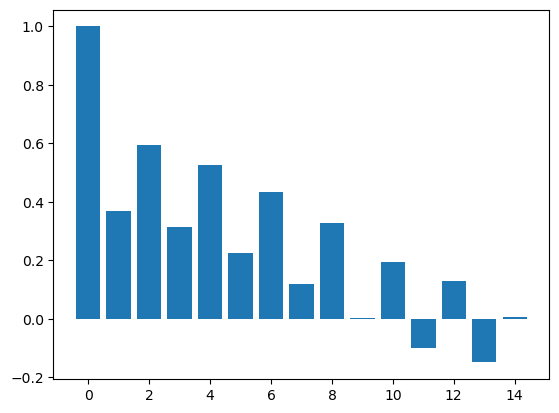

In [20]:
#from statsmodels.tsa.stattools import acf, pacf
acf_vals = acf(data['RADAR'])
num_lags = 15
plt.bar(range(num_lags), acf_vals[:num_lags])

- Building the ARIMA model with p=2, q=2 and d=1

<BarContainer object of 15 artists>

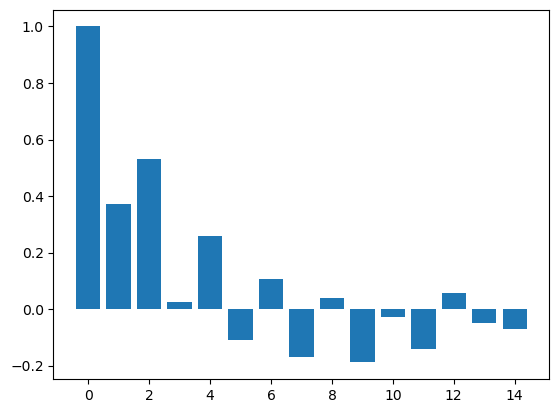

In [21]:
pacf_vals = pacf(data['RADAR'])
num_lags = 15
plt.bar(range(num_lags), pacf_vals[:num_lags])

-

SARIMAX MODEL

SEE ITERATE_230127_V3.ypnb
- Is a code that allows to determine SARIMAX parameters based on the minimum SQRT of the error

In [22]:
#Create a predicting model with training data, exclude test data.
data = data[(data.index>'2017-01-01') & (data.index<'2021-12-31')]


#this code is used to Perform stepwise search to minimize aic, the Akaike information criterion (AIC)
#the minimum AIC is a critirion to select the p,d,q values for SARIMAX.
#You may have to restart kernel and execute all in order to run this cell
#!pip install statsmodels --upgrade
#!pip install pmdarima
#https://www.youtube.com/watch?v=7Np6Y1MHr0E&t=632s

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
%matplotlib inline
from matplotlib.pylab import rcParams
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
#from statsmodels.tsa.seasonal import seasonal_decompose

#https://www.statsmodels.org/v0.10.2/examples/notebooks/generated/statespace_sarimax_stata.html
#The (p,d,q) order of the model for the number of AR parameters, differences, and MA parameters
#If your data is clearly seasonal, you should set the parameter seasonal = True
# m is the number of observations per year at 6-day temporal resolution, 61 observations at a 6-days observations.
# m with 12-day observations is 30

#auto_arima(data['RADAR'], seasonal=True, m=61, trace=True).summary()
auto_arima(data['RADAR'], stationary=True, seasonal=True, m=61, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True).summary()
#, allowmean = False, 
#  include.mean = TRUE, include.drift = FALSE, include.constant,

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[61] intercept   : AIC=inf, Time=20.47 sec
 ARIMA(0,0,0)(0,0,0)[61] intercept   : AIC=-351.388, Time=0.08 sec
 ARIMA(1,0,0)(1,0,0)[61] intercept   : AIC=-386.208, Time=8.22 sec
 ARIMA(0,0,1)(0,0,1)[61] intercept   : AIC=-363.332, Time=1.95 sec
 ARIMA(0,0,0)(0,0,0)[61]             : AIC=681.541, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[61] intercept   : AIC=-382.144, Time=0.16 sec
 ARIMA(1,0,0)(2,0,0)[61] intercept   : AIC=inf, Time=38.49 sec
 ARIMA(1,0,0)(1,0,1)[61] intercept   : AIC=inf, Time=11.85 sec
 ARIMA(1,0,0)(0,0,1)[61] intercept   : AIC=-383.175, Time=4.86 sec
 ARIMA(1,0,0)(2,0,1)[61] intercept   : AIC=inf, Time=45.04 sec
 ARIMA(0,0,0)(1,0,0)[61] intercept   : AIC=-360.451, Time=7.59 sec
 ARIMA(2,0,0)(1,0,0)[61] intercept   : AIC=-448.925, Time=11.74 sec
 ARIMA(2,0,0)(0,0,0)[61] intercept   : AIC=-486.931, Time=0.14 sec
 ARIMA(2,0,0)(0,0,1)[61] intercept   : AIC=-484.974, Time=5.76 sec
 ARIMA(2,0,0)(1,0,1)[61] intercept 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  281
Model:               SARIMAX(2, 0, 0)   Log Likelihood                 247.466
Date:                Thu, 09 Feb 2023   AIC                           -486.931
Time:                        09:17:39   BIC                           -472.378
Sample:                    05-20-2017   HQIC                          -481.094
                         - 12-25-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2346      0.045      5.235      0.000       0.147       0.322
ar.L1          0.1420      0.050      2.847      0.004       0.044       0.240
ar.L2          0.5651      0.052     10.965      0.000       0.464       0.666
sigma2         0.0100      0.001     11.416      0.000       0.008       0.012
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                 0.26
Prob(Q):                              0.77   Prob(JB):                         0.88
Heteroskedasticity (H):               0.83   Skew:                             0.04
Prob(H) (two-sided):                  0.36   Kurtosis:                         2.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

                                      SARIMAX Results                                       
Dep. Variable:                                RADAR   No. Observations:                  281
Model:             SARIMAX(2, 0, 0)x(0, 1, [1], 61)   Log Likelihood                 154.286
Date:                              Thu, 09 Feb 2023   AIC                           -300.572
Time:                                      09:18:06   BIC                           -286.997
Sample:                                  05-20-2017   HQIC                          -295.090
                                       - 12-25-2021                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0602      0.067     -0.905      0.365      -0.191       0.070
ar.L2          0.43

<Figure size 2000x1000 with 0 Axes>

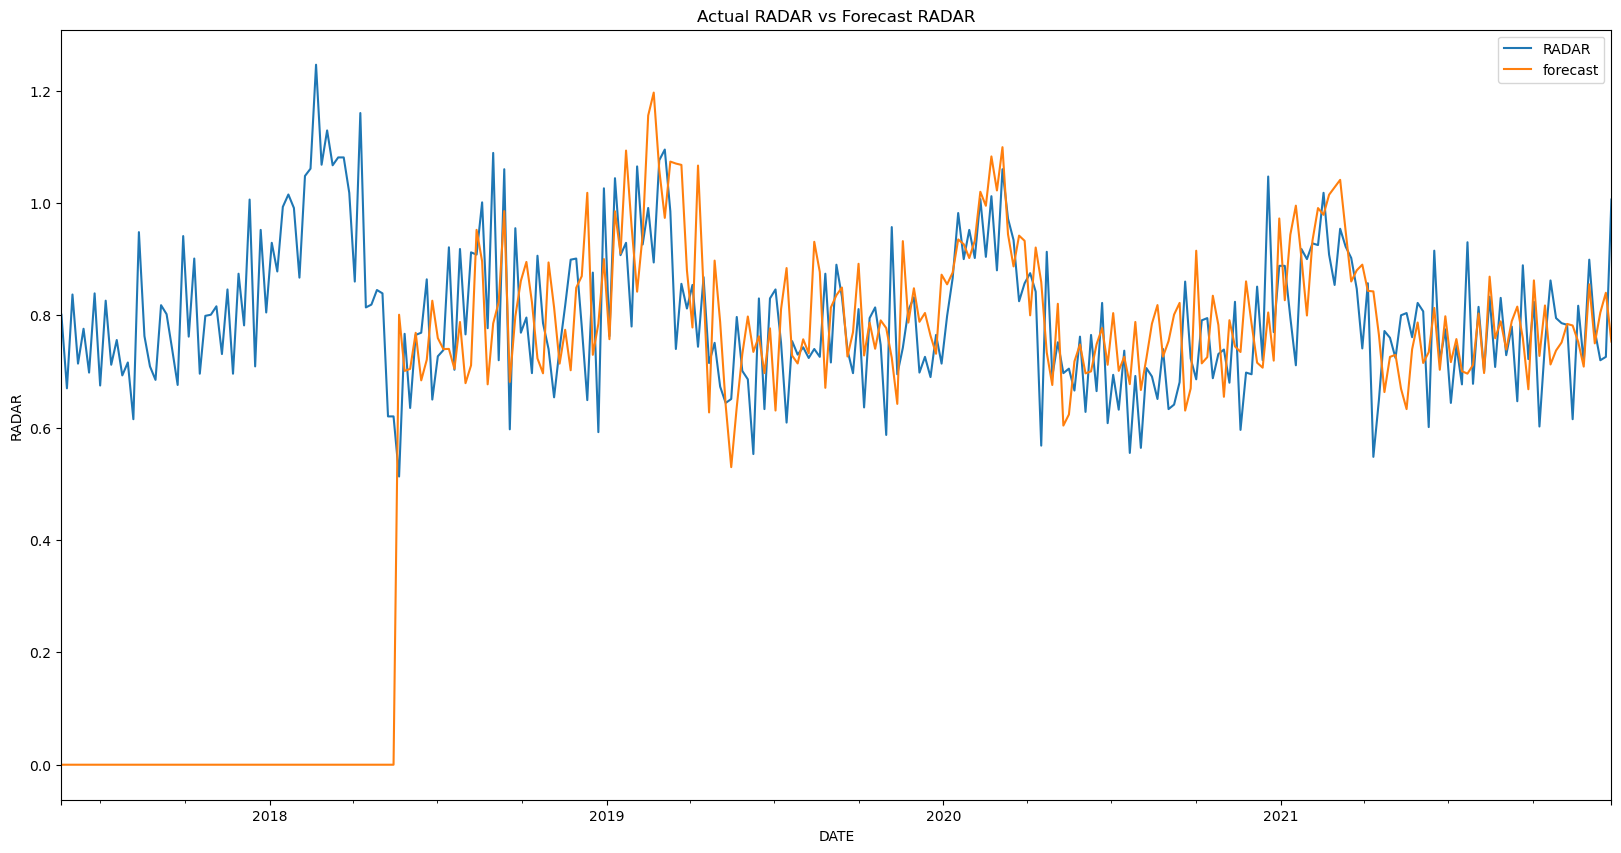

<Figure size 2000x1000 with 0 Axes>

In [23]:
import statsmodels.api as sm

#https://www.statsmodels.org/v0.10.2/examples/notebooks/generated/statespace_sarimax_stata.html
#The (p,d,q) order of the model for the number of: AR parameters, differences, and MA parameters. pdq values are required for "order" and "seasonal order"
# m, the last parameter of the seasonal order,  is the number of observations per year at 6-day temporal resolution, 61 observations at a 6-days observations.
#https://stats.stackexchange.com/questions/252718/convert-intercept-drift-term-to-constant-term-in-arima-auto-arima-functions



#model= SARIMAX(data['RADAR'], order=(3,0,1), seasonal_order= (1,2,0,61)) # RMSE 0.279
#model= SARIMAX(data['RADAR'], order=(2,1,2), seasonal_order= (0,1,1,61)) #good model so far to predict !!!!
#model= SARIMAX(data['RADAR'], order=(1,1,1), seasonal_order= (1,1,1,61)) #best RMSE-model so far to predict !!!! see iterate*.ipynb code
#model= SARIMAX(data['RADAR'], order=(1,0,2), seasonal_order= (1,2,0,61)) #the fit is missing during two years
#model= SARIMAX(data['RADAR'], order=(2,1,2), seasonal_order= (1,2,0,61))  #few peaks probably due to a zero value assumed by the model as a starting point.
#model= SARIMAX(data['RADAR'], order=(0,0,2), seasonal_order= (1,2,0,61)) #this model has a good fit and the effect of the zero value is lost after 2020.
#model= SARIMAX(data['RADAR'], order=(0,0,1), seasonal_order= (1,2,0,61)) #poor fit during the a couple of years
#model= SARIMAX(data['RADAR'], order=(1,0,2), seasonal_order= (0,1,0,61)) # (1,0,2) lowest three parameter RMSE
#model= SARIMAX(data['RADAR'], order=(0,0,2), seasonal_order= (1,2,0,61)) #SELECTED MODEL 230203, not good, only good to predict the "test" data.
#model= SARIMAX(data['RADAR'], order=(2,0,3), seasonal_order= (1,1,1,61)) # Best model:  ARIMA(2,0,3) with minimum RMSE for 50% of the observations(1,1,1,61)
model= SARIMAX(data['RADAR'], order=(2,0,0), seasonal_order= (0,1,1,61)) # Best model:  ARIMA(2,0,3) with minimum RMSE for 50% of the observations(1,1,1,61)


# , simple_differencing=True

results= model.fit()
print(results.summary())

#Prediction using SARIMAX and plot between actual and fitted values

data['forecast']= results.predict()

#Note that the column 'forecast' or fitted values is now appended to RADAR column in the df 'data'.
data[['RADAR', 'forecast']].plot(legend=True, figsize=(20,10))
plt.title('Actual RADAR vs Forecast RADAR')

plt.ylabel('RADAR')
plt.figure(figsize=(20,10))
#plt.show()


SPLIT TS INTO TRAIN AND TEST TO VALIDATE PREDICTION WITH DATA NOT USED BY model

In [24]:
#Define "data" again, in order to split into training and testing

path=r"C:\Users\jesus\Downloads\S1_mergeBOTH_230208_RVI_V2.csv"  #to be used with windows and Anaconda
#path="/content/ee-chart (70).csv"
#path="/content/LosPericos_ascending_VH_230202.csv"
#path="/content/S1_ASCENDING_230206_n279.csv"

# read the file with pandas: pd.read_csv(path), location by defaul in Colab or Anaconda for Windows
data = pd.read_csv(path)

# apply the dtype attribute
data = pd.read_csv(path, index_col='DATE', parse_dates=True, infer_datetime_format=True).asfreq(freq='6D')

#Fill NaN data
data = data.fillna(method = 'ffill')

#define dates range if needed:
data = data[(data.index>'2017-05-01') & (data.index<'2024-12-31')]


print(data.head(15))
print(data.tail(15))

result_data_type = data.dtypes
print("Output:")
print(result_data_type)
len(data)


            RADAR
DATE             
2017-05-20  0.801
2017-05-26  0.670
2017-06-01  0.837
2017-06-07  0.714
2017-06-13  0.776
2017-06-19  0.698
2017-06-25  0.839
2017-07-01  0.675
2017-07-07  0.826
2017-07-13  0.712
2017-07-19  0.756
2017-07-25  0.693
2017-07-31  0.716
2017-08-06  0.615
2017-08-12  0.948
            RADAR
DATE             
2022-11-08  0.724
2022-11-14  0.897
2022-11-20  0.726
2022-11-26  0.750
2022-12-02  0.743
2022-12-08  0.887
2022-12-14  0.810
2022-12-20  0.851
2022-12-26  0.828
2023-01-01  0.864
2023-01-07  0.743
2023-01-13  0.749
2023-01-19  0.743
2023-01-25  0.901
2023-01-31  0.901
Output:
RADAR    float64
dtype: object


348

In [25]:
#Split the data into 70% to train (255 values) and 30% to test (107), the total is 362.
#this is not a minor decision.  30% of the data is a large period of time to predict.  The longer this period the less accuarate the results spliting training and testing with 70%, 30% might be too much.
train_data = data.iloc[:283] # % of the TS for training
test_data = data.iloc[283:] # % of the TS left for testing

obs_data = len(data)
obs_training = len(train_data)
obs_test = len(test_data)

print(obs_data)
print(obs_training)
print(obs_test)

348
283
65


                                      SARIMAX Results                                       
Dep. Variable:                                RADAR   No. Observations:                  283
Model:             SARIMAX(2, 0, 0)x(0, 1, [1], 61)   Log Likelihood                 154.182
Date:                              Thu, 09 Feb 2023   AIC                           -300.364
Time:                                      09:18:24   BIC                           -286.754
Sample:                                  05-20-2017   HQIC                          -294.869
                                       - 01-06-2022                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0502      0.065     -0.775      0.439      -0.177       0.077
ar.L2          0.42

<AxesSubplot:xlabel='DATE'>

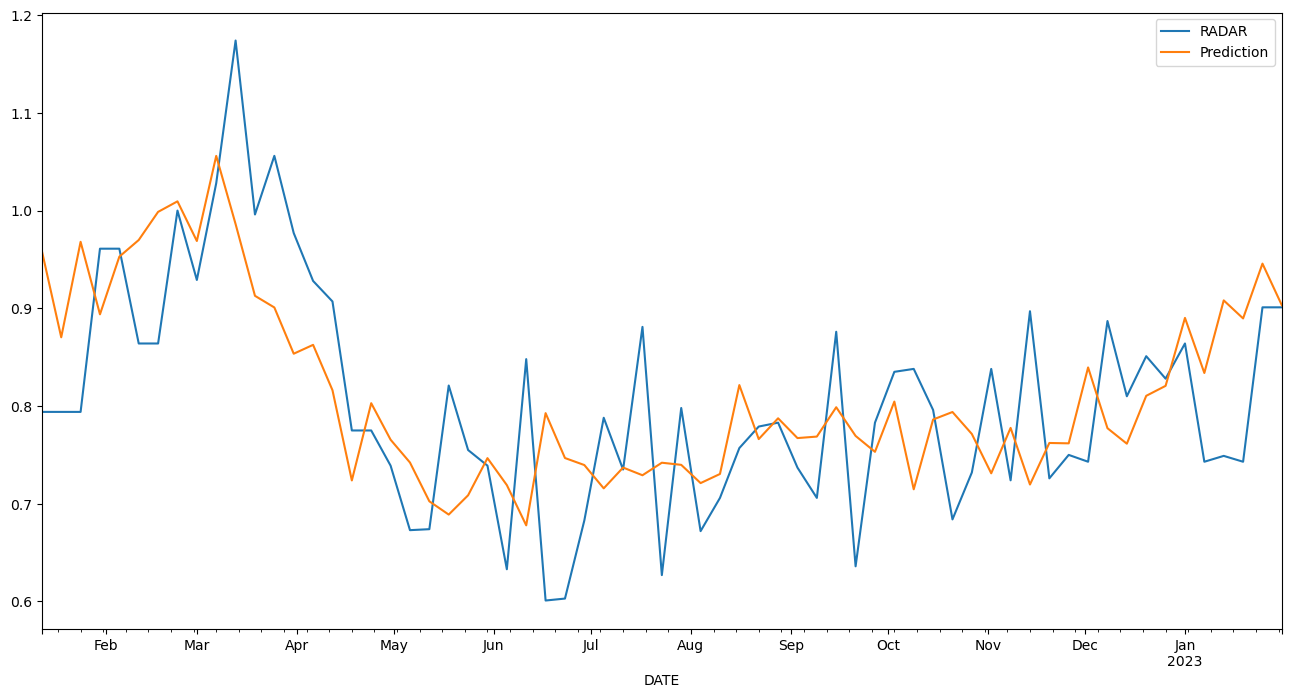

In [26]:
##model= SARIMAX(data['RADAR'], order=(1,1,1), seasonal_order= (1,1,1,61)) #best model so far to predict seasonality and forecast!!!! see iterate*.ipynb code
#model= SARIMAX(data['RADAR'], order=(2,1,3), seasonal_order= (0,0,0,56)) # all p values are significant

#create a model only with train data

#model= SARIMAX(train_data['RADAR'], order=(1,0,2), seasonal_order= (1,2,0,61)) #very good prediction and p values are significant, lowest iterated RMSE
#model= SARIMAX(train_data['RADAR'], order=(0,0,2), seasonal_order= (1,2,0,61)) #the best predicion so fat with p values significant, but missed two years of fitting.
#model= SARIMAX(train_data['RADAR'], order=(0,0,1), seasonal_order= (1,2,0,61)) #too noise in the rest of the TS
#model= SARIMAX(train_data['RADAR'], order=(2,0,0), seasonal_order= (1,2,0,61)) #too noise in the rest of the TS high innacurate predictions
#model= SARIMAX(train_data['RADAR'], order=(2,0,3), seasonal_order= (1,1,1,61)) #BEST ARIMA MODEL for order1 and best RMSE for seasonal
#model= SARIMAX(train_data['RADAR'], order=(2,0,3), seasonal_order= (1,2,0,61)) # the three parameter was selected based on ARIMA results, but the model is not as good as others.
model= SARIMAX(train_data['RADAR'], order=(2,0,0), seasonal_order= (0,1,1,61))

results_train = model.fit()
print(results_train.summary())

# Get prediction for reserved test data
start = len(train_data)# len will generate the number of observations in "train_data", that is the "start"
end = len(data) - 1

#Compare model prediction made with train data WITH observed data unseen by the model (test).
# type typ : levels - Predict original endogenous variables
# linear : Linear prediction
prediction_test = results_train.predict(start, end, 
                         typ='linear').rename('Prediction')
test_data.plot(legend=True, figsize=(16,8))
prediction_test.plot(legend=True)


FORECAST For NEXT 10 YEARS USING SARIMAX

In [27]:
future_pred = results_train.predict(start= len(data), end= len(data)+30, typ='levels')
future_pred

2023-02-06    0.943010
2023-02-12    0.974258
2023-02-18    0.994294
2023-02-24    1.011503
2023-03-02    0.966923
2023-03-08    1.056910
2023-03-14    0.985298
2023-03-20    0.913229
2023-03-26    0.900470
2023-04-01    0.853750
2023-04-07    0.862428
2023-04-13    0.816300
2023-04-19    0.723789
2023-04-25    0.802953
2023-05-01    0.765507
2023-05-07    0.742210
2023-05-13    0.702503
2023-05-19    0.688944
2023-05-25    0.708666
2023-05-31    0.746687
2023-06-06    0.719097
2023-06-12    0.677920
2023-06-18    0.792729
2023-06-24    0.746804
2023-06-30    0.739618
2023-07-06    0.715780
2023-07-12    0.737055
2023-07-18    0.729185
2023-07-24    0.742005
2023-07-30    0.739824
2023-08-05    0.721155
Freq: 6D, Name: predicted_mean, dtype: float64

Plot showing forecast for next 10 years using SARIMAX

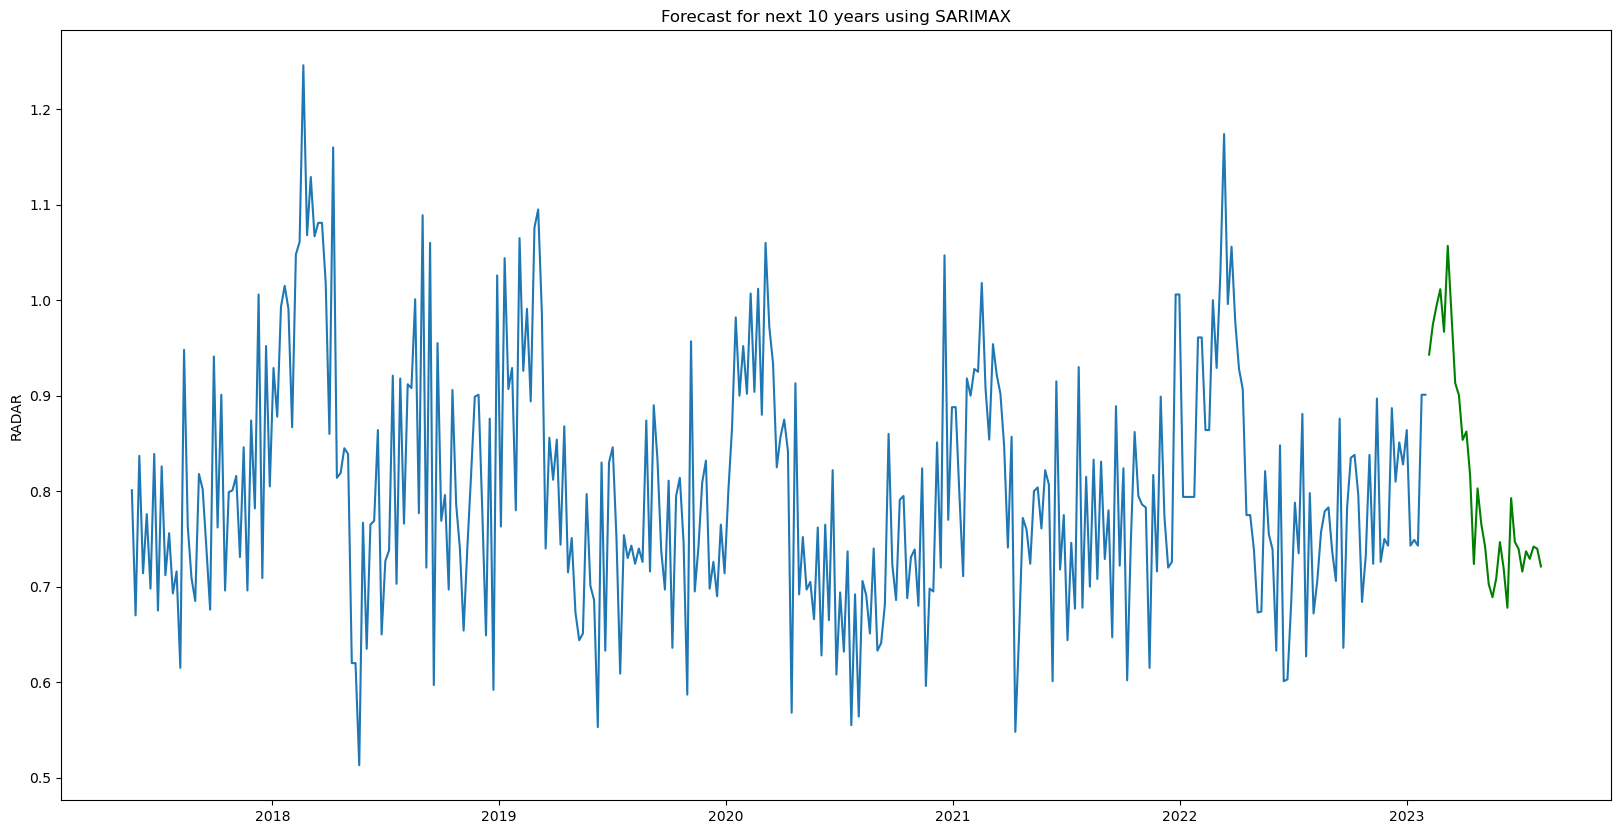

In [28]:
# Final visualization showing the actual dataset and forecasted data:
plt.figure(figsize=(20,10))
plt.plot(future_pred, color='green')
plt.plot(data['RADAR'])
plt.title('Forecast for next 10 years using SARIMAX')
plt.ylabel('RADAR')
plt.show()


<b>*************************End****************************</b>